In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
rc_defaults = dict(mpl.rcParams)

In [2]:
def gen_data(N=8, step=1.5):
    xs = np.linspace(-10, 10, 300)
    Ns = (np.arange(N)[::-1] - N/2.) * step
    noise1 = np.random.normal(scale=8.0 / len(xs), size=(len(xs), N))
    noise2 = np.random.normal(scale=0.3, size=(len(xs), N))
    noise = (np.cumsum(noise1, axis=0) + noise2)
    ys = np.exp(-np.exp(np.add.outer(xs, Ns) + noise))
    return xs, ys

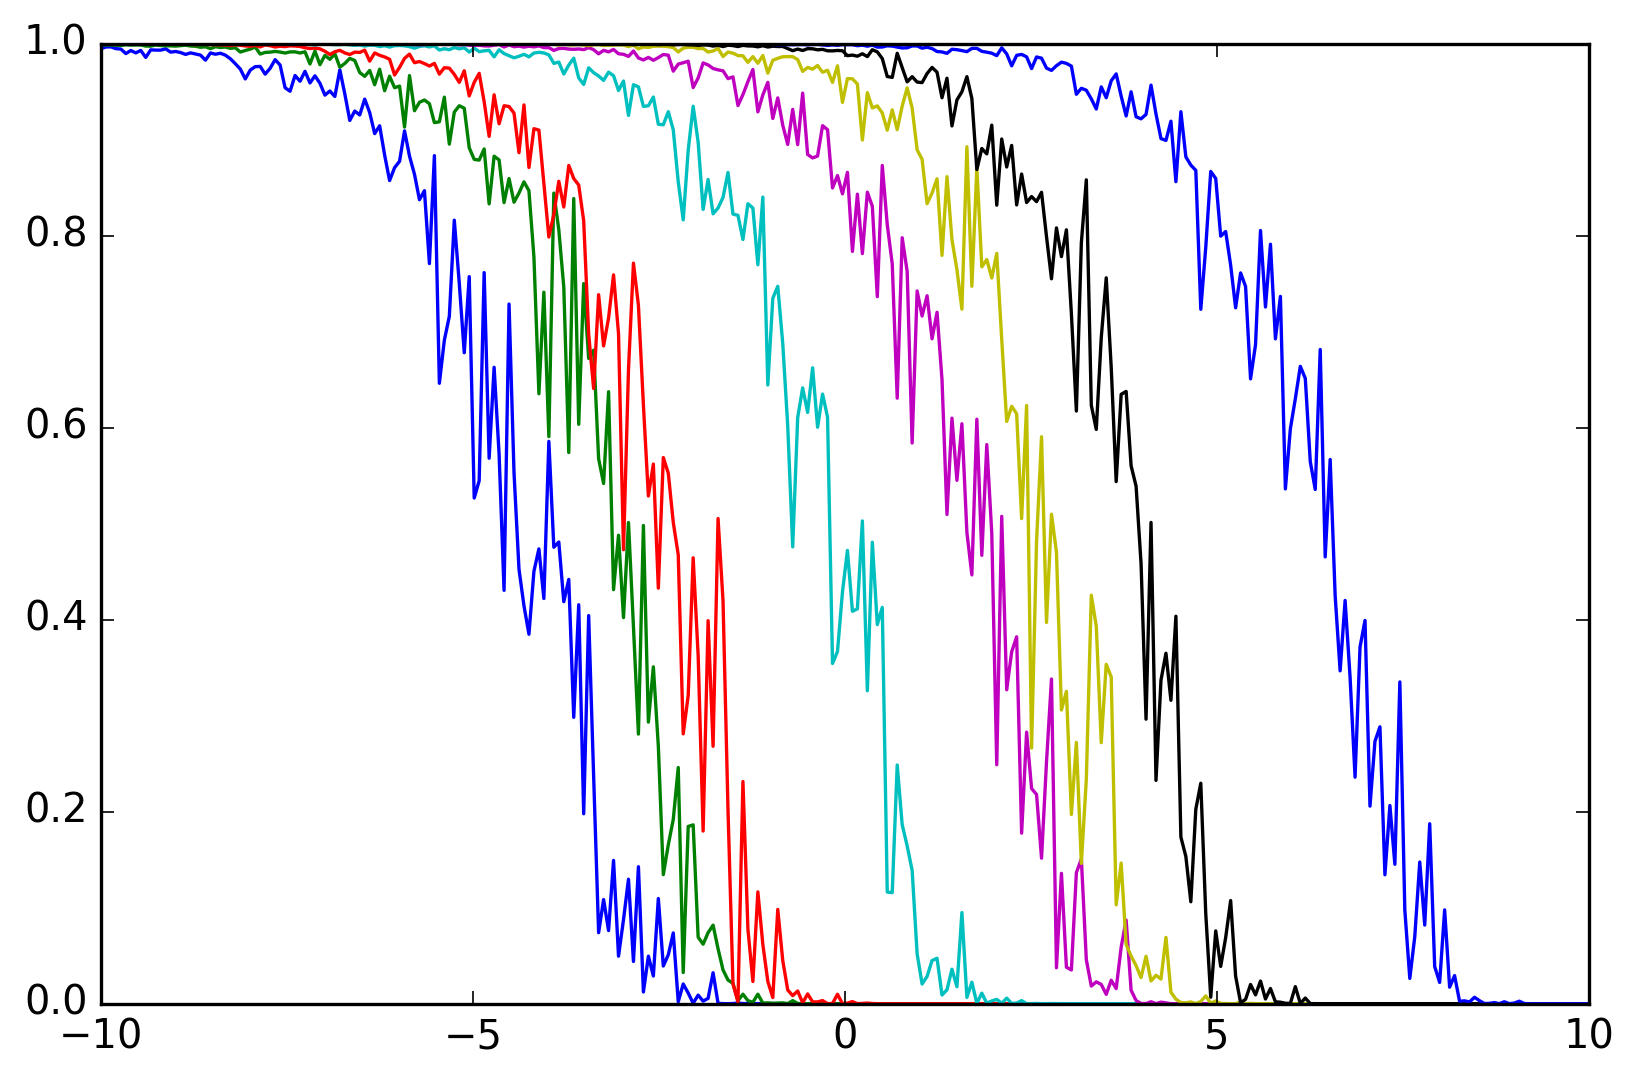

In [3]:
# Show data with default configuration options
mpl.rcParams.update(rc_defaults)
xs, ys = gen_data()
plt.plot(xs, ys)
plt.savefig('imgs/defaults.svg')

In [4]:
import mutedcolors
mutedcolors.new_cmaps()
style.use('stylelib/muted.mplstyle')

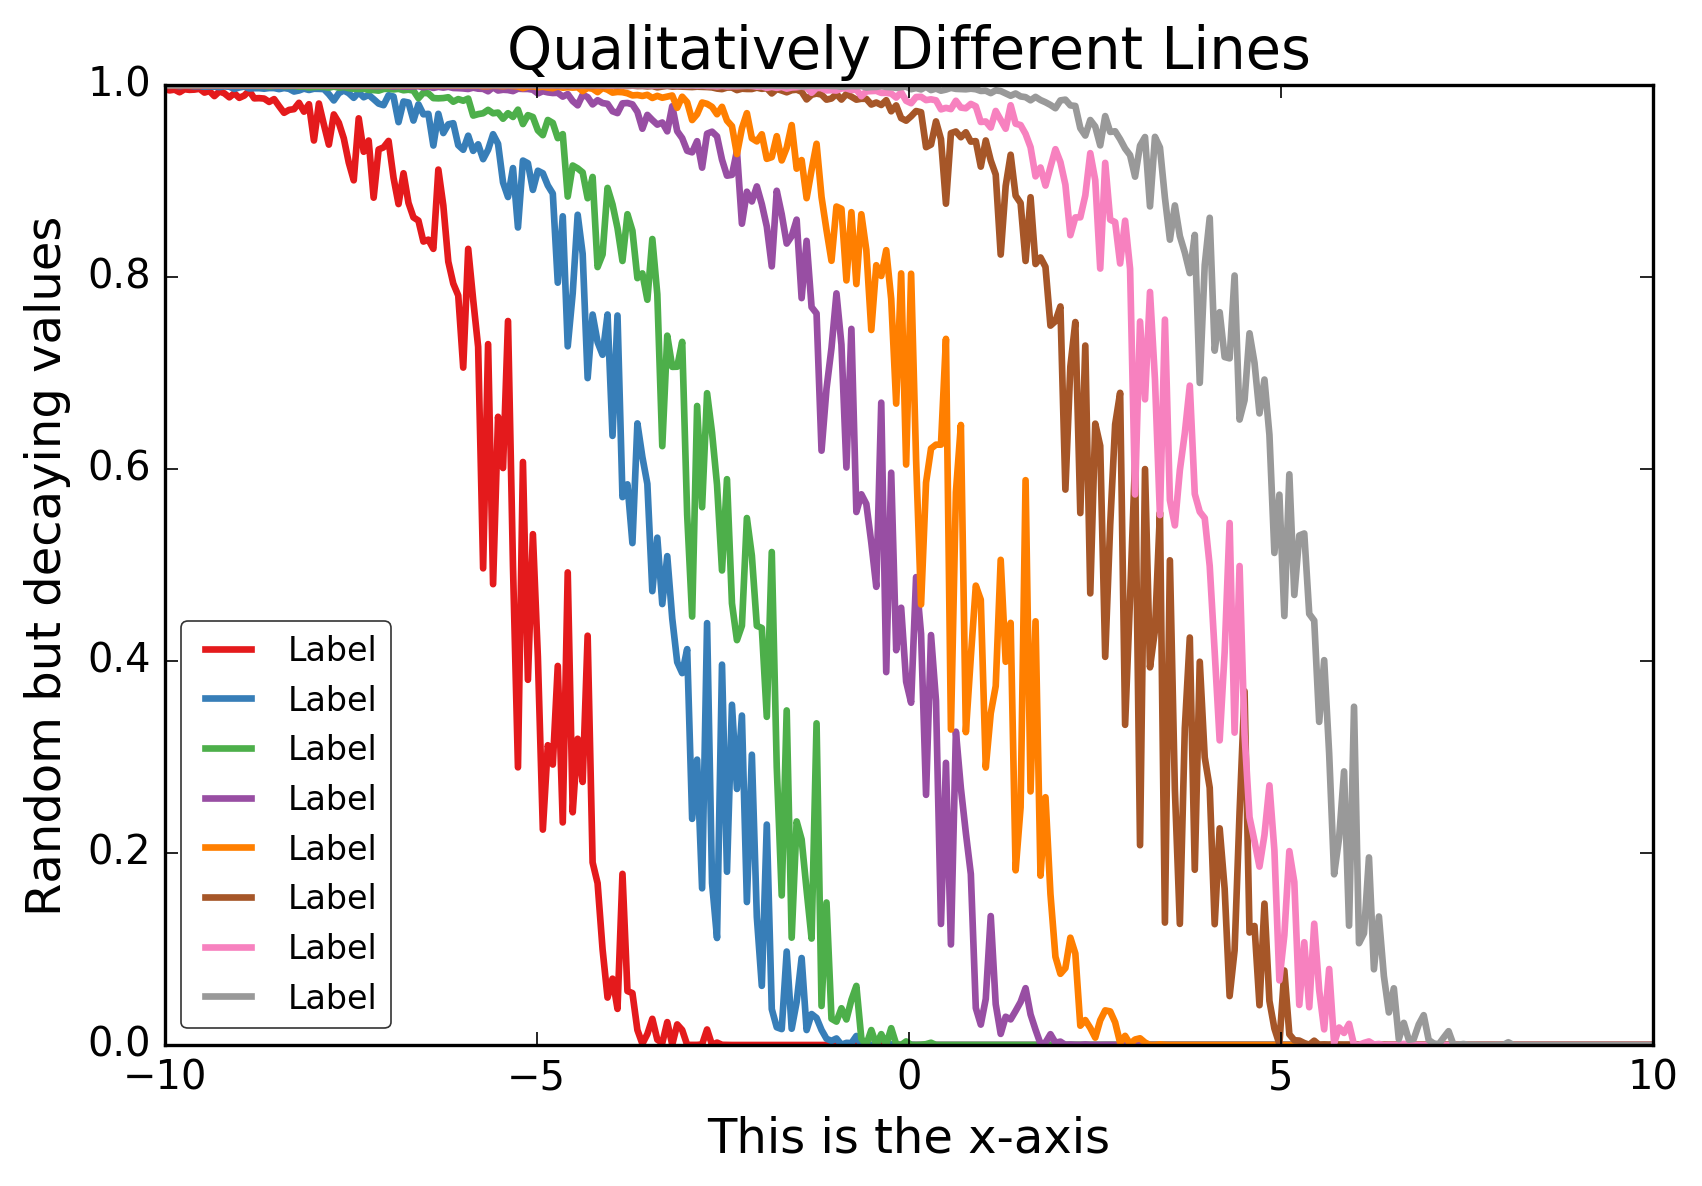

In [5]:
fig, ax = plt.subplots()
xs, ys = gen_data()
ax.plot(xs, ys, label='Label')
ax.legend(loc='lower left')
ax.set_title('Qualitatively Different Lines')
ax.set_xlabel('This is the x-axis')
ax.set_ylabel('Random but decaying values')
fig.savefig('imgs/qualitative.svg')

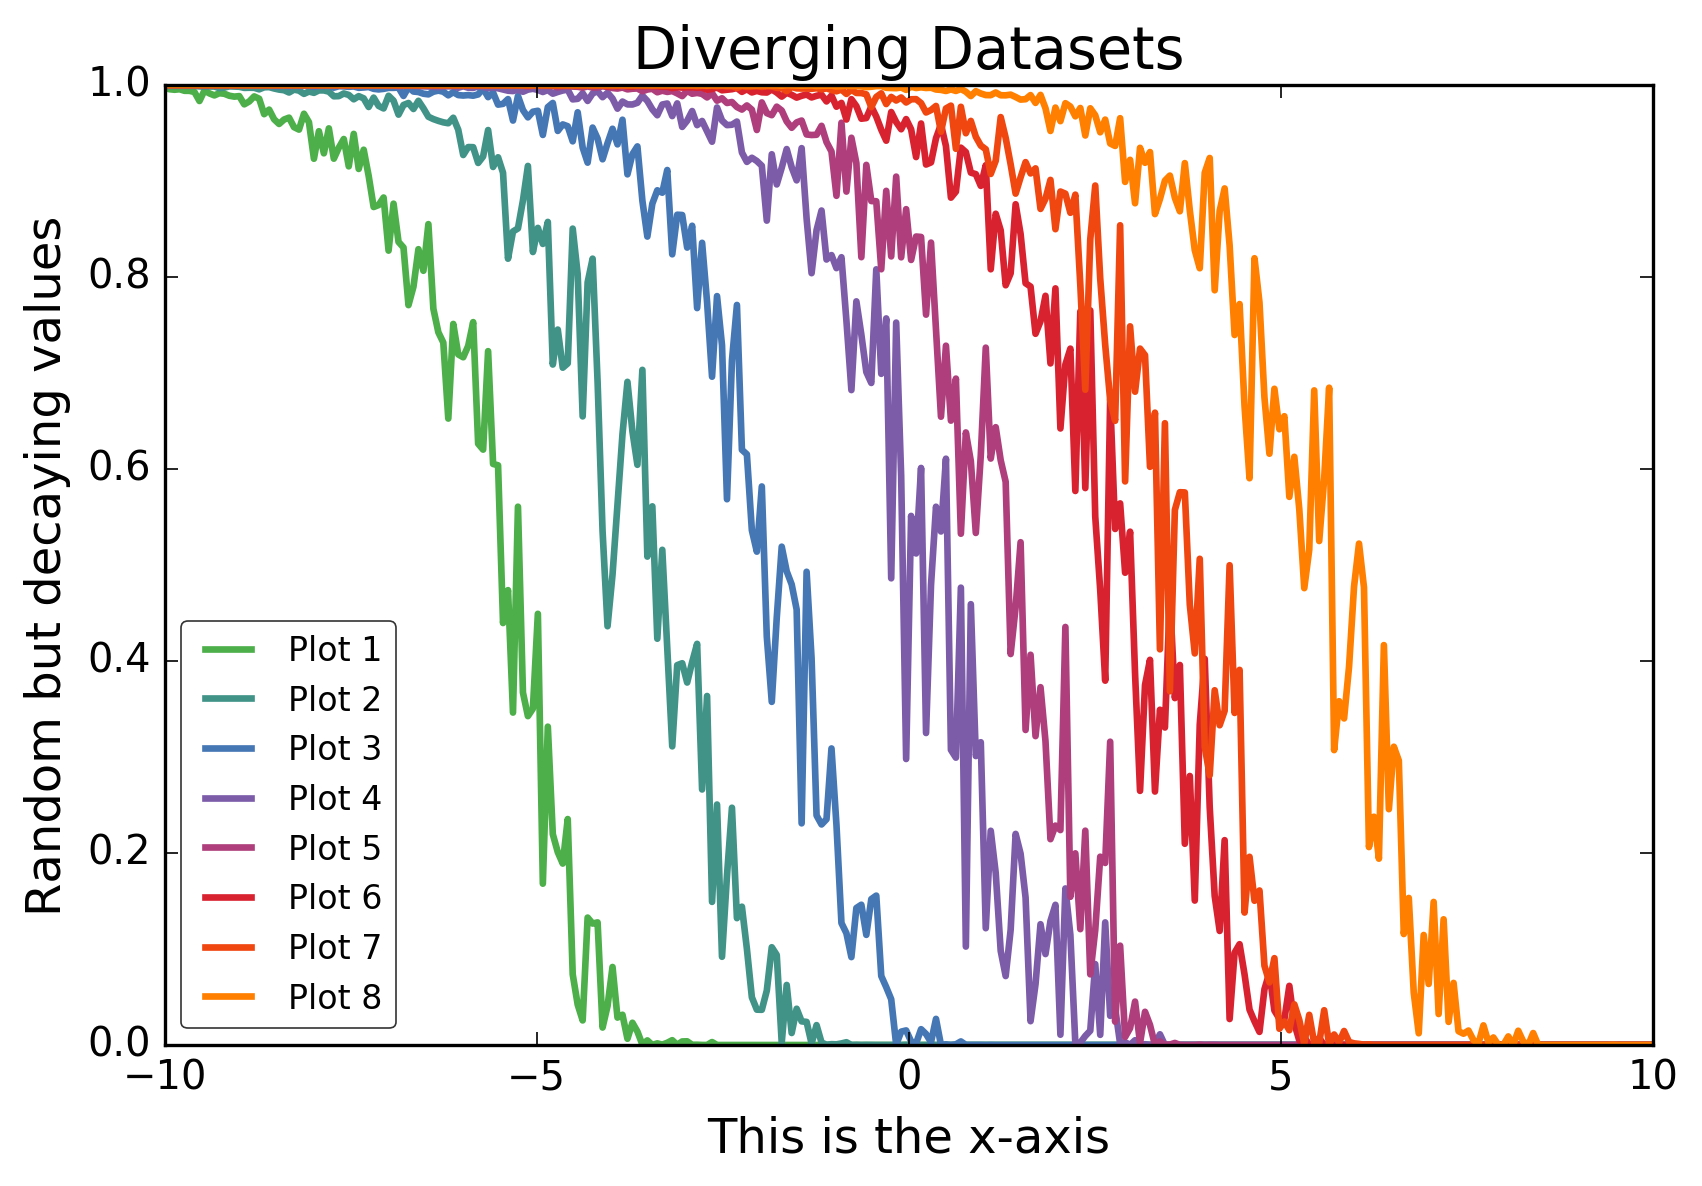

In [6]:
fig, ax = plt.subplots()
xs, ys = gen_data()
for n,color,y in mutedcolors.eczip(ys.T, cmap='grormute', start=1):
    ax.plot(xs, y, color=color, label='Plot %s' % n)
ax.legend(loc='lower left')
ax.set_title('Diverging Datasets')
ax.set_xlabel('This is the x-axis')
ax.set_ylabel('Random but decaying values')
fig.savefig('imgs/diverging.svg')

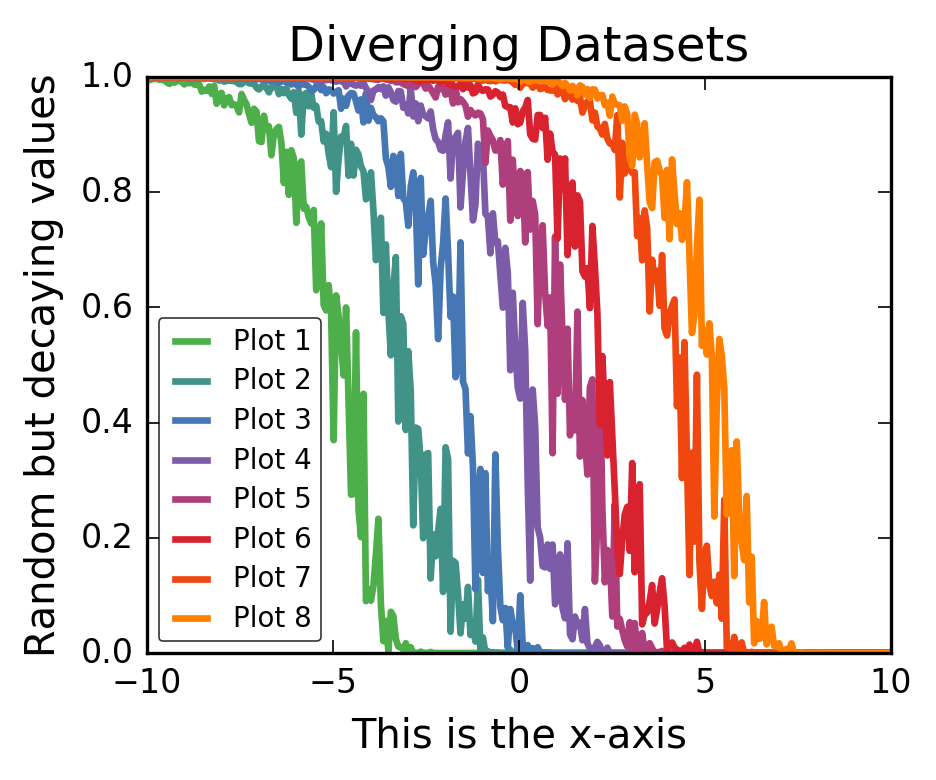

In [7]:
xs, ys = gen_data()
with style.context('stylelib/small.mplstyle'):
    fig, ax = plt.subplots()
    for n,color,y in mutedcolors.eczip(ys.T, cmap='grormute', start=1):
        ax.plot(xs, y, color=color, label='Plot %s' % n)
    ax.legend(loc='lower left')
    ax.set_title('Diverging Datasets')
    ax.set_xlabel('This is the x-axis')
    ax.set_ylabel('Random but decaying values')
fig.savefig('imgs/diverging-small.svg')

In [8]:
def more_data(N=8, npieces=100, step=1.5):
    xs, ys = zip(*[gen_data(N, step=step) for _ in range(npieces)])
    return np.mean(xs, axis=0), np.asarray(ys)

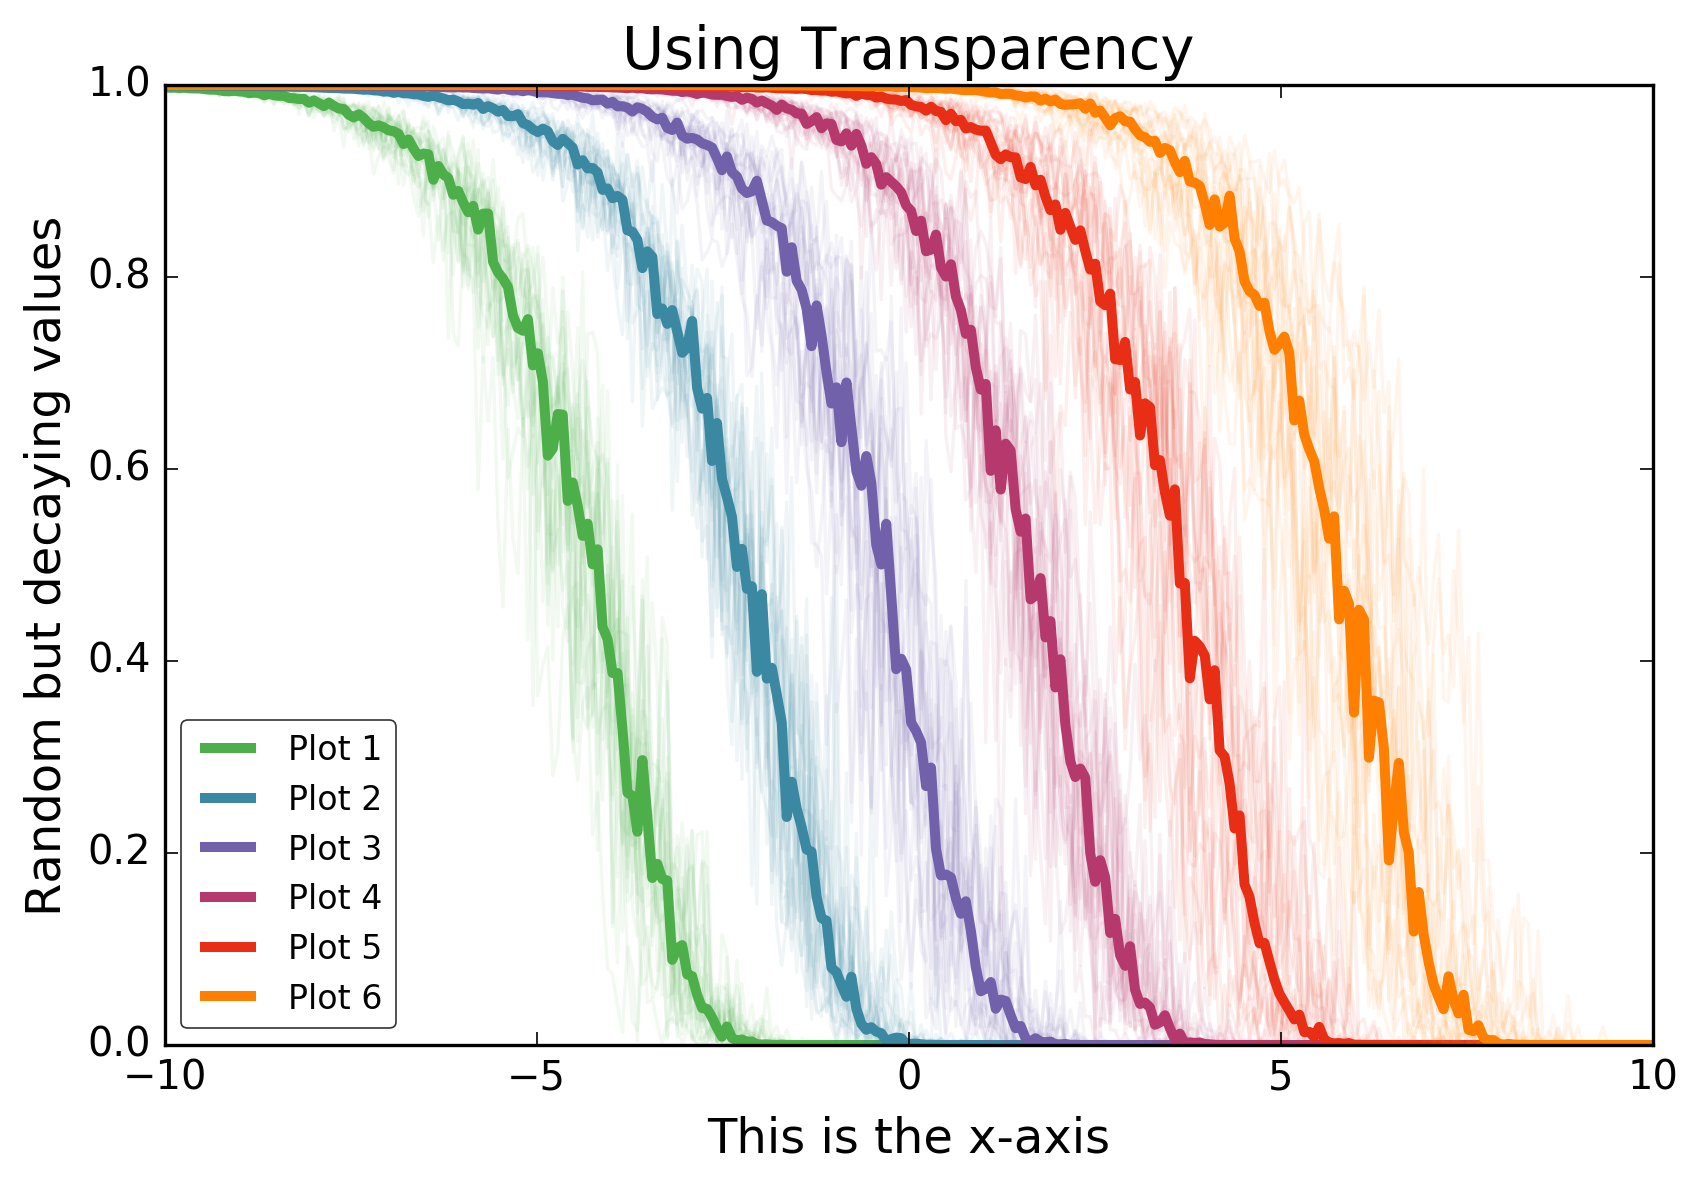

In [9]:
fig, ax = plt.subplots()
N = 6
N_in_set = 20
xs, ys = more_data(N, N_in_set, step=2)
for n,color,yset in mutedcolors.eczip(ys.T, cmap='grormute', start=1):
    ax.plot(xs, yset, color=color, linewidth=1, linestyle='-', alpha=1.5 / N_in_set)
    ax.plot(xs, np.median(yset, axis=-1), color=color, label='Plot %s' % n, linewidth=3, linestyle='-', alpha=1.0)
ax.legend(loc='lower left')
ax.set_title('Using Transparency')
ax.set_xlabel('This is the x-axis')
ax.set_ylabel('Random but decaying values')
fig.savefig('imgs/transparency.svg')